<a href="https://colab.research.google.com/github/Moneeba136/ml-mini-projects/blob/main/task-1-student-score-prediction/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# Load dataset
df = pd.read_csv("Student_Performance_Factors.csv.csv")

# Preview data
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving Student_Performance_Factors.csv.csv to Student_Performance_Factors.csv.csv
User uploaded file "Student_Performance_Factors.csv.csv" with length 641949 bytes


In [6]:
# Check missing values
df.isnull().sum()

# Drop missing values (simple approach)
df.dropna(inplace=True)


In [7]:
X = df[['Hours_Studied']]   # Input feature
y = df['Exam_Score']        # Target


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 2.529242069526125
MSE: 12.351733799445535
RMSE: 3.5145033503249836
R² Score: 0.2051306083246669


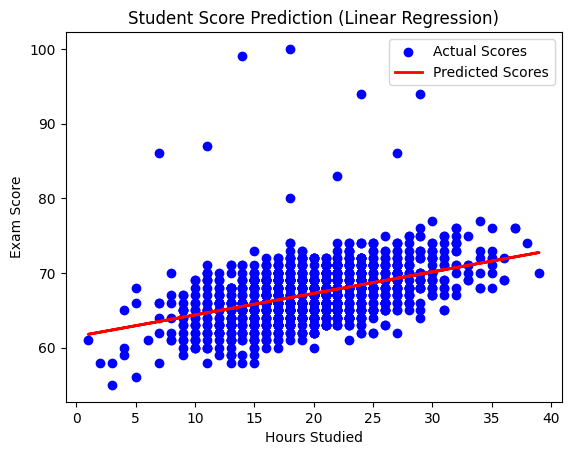

In [12]:
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Scores')

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Student Score Prediction (Linear Regression)")
plt.legend()
plt.show()


In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)

print("Polynomial R²:", r2_score(y_test, y_pred_poly))


Polynomial R²: 0.2050784559067499


In [14]:
X = df[['Hours_Studied', 'Sleep_Hours', 'Attendance']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² with multiple features:", r2_score(y_test, y_pred))


R² with multiple features: 0.5483304011758173


After uploading the file, you should be able to run the cell to load the dataset.